# Forest Cover Classification

In this project, we will use deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data.The covertypes are the following:

1] Spruce/Fir

2] Lodgepole Pine

3] Ponderosa Pine

4] Cottonwood/Willow

5] Aspen

6] Douglas-fir

7] Krummholz

**Project Objectives:**





*   Develop one or more classifiers for this multi-class classification problem.

*   Use TensorFlow with Keras to build our classifier(s).



*   Use our knowledge of hyperparameter tuning to improve the performance of our model(s).
*   Test and analyze performance.

*   Create clean and modular code.






















In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense,Dropout
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
print(df.info())
print(df['class'].unique())
# Selecting all features column for Scaling
all_column = []
for i in df.columns:
  all_column.append(i)
print(all_column.pop())
features_column =  all_column
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
# Selects the first 54 columns as features
features = df.iloc[:,0:54]
# Selects the last class columns as labels
labels = df.iloc[:,-1]
# Splitting the data for training and testing
train_x,test_x,train_y,test_y = train_test_split(features,labels,test_size = 0.2,random_state=42,stratify=labels)
# Standardizing The data
ct = ColumnTransformer([('numeric',StandardScaler(),features_column)],remainder='passthrough')
features_train_scaled = ct.fit_transform(train_x)
features_test_scaled = ct.transform(test_x)
# Transforming Labels
le = LabelEncoder()
train_y = le.fit_transform(train_y.astype('str'))
test_y = le.transform(test_y.astype('str'))
train_y = to_categorical(train_y,dtype='int64')
test_y = to_categorical(test_y,dtype='int64')



In [5]:
# Building your model
def model_design(features):
  model = Sequential()
  model.add(InputLayer(input_shape=(features.shape[1],)))
  model.add(Dense(55,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(45,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(7,activation='softmax'))
  model.compile(loss=CategoricalCrossentropy(),metrics=[CategoricalAccuracy()],optimizer=Adam(learning_rate=0.001))
  model.summary()
  return model

In [6]:
# Training The Model
es = EarlyStopping(patience = 10)
model = model_design(features_train_scaled)
history = model.fit(features_train_scaled,train_y,batch_size=1100,epochs=110,verbose=1,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 55)                3025      
                                                                 
 dropout (Dropout)           (None, 55)                0         
                                                                 
 dense_1 (Dense)             (None, 45)                2520      
                                                                 
 dropout_1 (Dropout)         (None, 45)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1380      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 7)                 2

In [7]:
loss,accuracy = model.evaluate(features_test_scaled,test_y,verbose=0)
print(loss,accuracy)

0.371061772108078 0.8486355543136597


In [8]:
y_predict = np.argmax(model.predict(features_test_scaled),axis=1)
y_true = np.argmax(test_y,axis=1)
print(classification_report(y_true,y_predict,zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     42368
           1       0.85      0.90      0.88     56661
           2       0.79      0.88      0.83      7151
           3       0.79      0.67      0.73       549
           4       0.78      0.37      0.51      1899
           5       0.75      0.55      0.63      3473
           6       0.88      0.84      0.86      4102

    accuracy                           0.85    116203
   macro avg       0.81      0.72      0.75    116203
weighted avg       0.85      0.85      0.85    116203



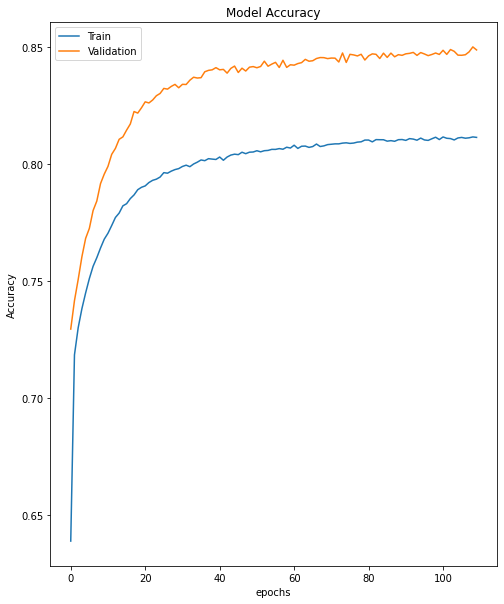

In [9]:
plt.figure(figsize=(8,10))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

I reached 85% accuracy.

I tried to change batch_size with learning_rate… This values gave the best accuracy/performance.
I tried to modify the model as well. Models with lower hidden layers gave too small accuracy. More complex model increase the running time but not raise the accuracy significantly.